# Pemetaan Klaster Provinsi di Indonesia Berdasarkan Profil Kesejahteraan dan Analisisnya terhadap Tren Inflasi Nasional (2010-2023)

In [ ]:
import pandas as pd

# Path
file_paths = {
    "Kemiskinan": "/content/persentase penduduk miskin.csv",
    "Inflasi": "/content/Inflasi (Y on Y) Berdasarkan Bulan di Indonesia.csv",
    "Pengeluaran": "/content/Jumlah Pengeluaran per Kapita Berdasarkan Provinsi di Indonesia.csv",
    "IPM": "/content/Indeks Pembangunan Manusia Berdasarkan Provinsi di Indonesia.xlsx",
    "HLS": "/content/harapan lama sekolah provinsi di indonesia.csv"
}

# Cek Data
def inspect_file(file_name, file_path):
    print(f"================== MEMERIKSA FILE: {file_name} ==================")
    try:
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        else:
            print("Format file tidak didukung.")
            return

        print("\n[--- 5 BARIS PERTAMA ---]")
        print(df.head())

        print("\n[--- INFO KOLOM ---]")
        df.info()

        print("\n[--- 5 BARIS TERAKHIR ---]")
        print(df.tail())

    except FileNotFoundError:
        print(f"!!! KESALAHAN: File tidak ditemukan di path ini: {file_path}")
        print("!!! PASTIKAN NAMA FILE DAN LOKASI UPLOAD SUDAH BENAR.")
    except Exception as e:
        print(f"!!! Terjadi kesalahan saat membaca file: {e}")
    finally:
        print("\n" * 2)

for name, path in file_paths.items():
    inspect_file(name, path)

================== MEMERIKSA FILE: Kemiskinan ==================

[--- 5 BARIS PERTAMA ---]
   id  kode_provinsi   nama_provinsi  persentase_penduduk_miskin  satuan  \
0   1             11            ACEH                       19.95  PERSEN   
1   2             12  SUMATERA UTARA                       11.36  PERSEN   
2   3             13  SUMATERA BARAT                        9.44  PERSEN   
3   4             14            RIAU                       10.01  PERSEN   
4   5             15           JAMBI                        8.40  PERSEN   

   tahun  
0   2010  
1   2010  
2   2010  
3   2010  
4   2010  

[--- INFO KOLOM ---]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 570 entries, 0 to 569
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          570 non-null    int64  
 1   kode_provinsi               570 non-null    int64  
 2   nama_provinsi             

In [ ]:
import pandas as pd

# Path
paths = {
    "Kemiskinan": "/content/persentase penduduk miskin.csv",
    "Pengeluaran": "/content/Jumlah Pengeluaran per Kapita Berdasarkan Provinsi di Indonesia.csv",
    "IPM": "/content/Indeks Pembangunan Manusia Berdasarkan Provinsi di Indonesia.xlsx",
    "HLS": "/content/harapan lama sekolah provinsi di indonesia.csv"
}

# Dict File
try:
    df_kemiskinan = pd.read_csv(paths["Kemiskinan"])
    df_pengeluaran = pd.read_csv(paths["Pengeluaran"])
    df_ipm = pd.read_excel(paths["IPM"])
    df_hls = pd.read_csv(paths["HLS"])

    # --- 1. Menyamakan Data ---

    # 1. Kemiskinan
    df_kemiskinan = df_kemiskinan[['nama_provinsi', 'tahun', 'persentase_penduduk_miskin']]
    df_kemiskinan = df_kemiskinan.rename(columns={'persentase_penduduk_miskin': 'kemiskinan'})

    # 2. Pengeluaran
    df_pengeluaran = df_pengeluaran[['nama_provinsi', 'tahun', 'jumlah_pengeluaran_per_kapita']]
    df_pengeluaran = df_pengeluaran.rename(columns={'jumlah_pengeluaran_per_kapita': 'pengeluaran'})
    df_pengeluaran['pengeluaran'] = df_pengeluaran['pengeluaran'] / 1000

    # 3. IPM
    df_ipm = df_ipm[['nama_provinsi', 'tahun', 'indeks_pembangunan_manusia']]
    df_ipm = df_ipm.rename(columns={'indeks_pembangunan_manusia': 'ipm'})

    # 4. HLS
    df_hls = df_hls[['nama_provinsi', 'tahun', 'harapan_lama_sekolah']]
    df_hls = df_hls.rename(columns={'harapan_lama_sekolah': 'hls'})

    # --- 2. Menyamakan Tahun (2010-2023) ---
    tahun_min = 2010
    tahun_max = 2023

    df_kemiskinan = df_kemiskinan[df_kemiskinan['tahun'].between(tahun_min, tahun_max)]
    df_pengeluaran = df_pengeluaran[df_pengeluaran['tahun'].between(tahun_min, tahun_max)]
    df_ipm = df_ipm[df_ipm['tahun'].between(tahun_min, tahun_max)]
    df_hls = df_hls[df_hls['tahun'].between(tahun_min, tahun_max)]


    # --- 3. Menggabungkan Data ---
    df_merged = pd.merge(df_kemiskinan, df_pengeluaran, on=['nama_provinsi', 'tahun'], how='inner')
    df_merged = pd.merge(df_merged, df_ipm, on=['nama_provinsi', 'tahun'], how='inner')
    df_merged = pd.merge(df_merged, df_hls, on=['nama_provinsi', 'tahun'], how='inner')


    # --- 4. MENYIMPAN HASIL GABUNGAN KE CSV ---
    output_filename = 'data_provinsi_gabungann.csv'
    df_merged.to_csv(output_filename, index=False)

    print(f"================== DATA BERHASIL DIGABUNGKAN==================")
    print(f"Hasilnya telah disimpan ke dalam file baru bernama: '{output_filename}'")
    print("\n5 baris pertama dari data gabungan:")
    print(df_merged.head())


except FileNotFoundError as e:
    print(f"!!! KESALAHAN: File tidak ditemukan. Pastikan path sudah benar. Path yang error: {e.filename}")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== DATA BERHASIL DIGABUNGKAN==================
Hasilnya telah disimpan ke dalam file baru bernama: 'data_provinsi_gabungann.csv'

5 baris pertama dari data gabungan:
    nama_provinsi  tahun  kemiskinan  pengeluaran    ipm    hls
0            ACEH   2010       19.95      7.93373  67.09  12.90
1  SUMATERA UTARA   2010       11.36      9.19567  67.09  11.82
2  SUMATERA BARAT   2010        9.44      9.33912  67.25  12.22
3            RIAU   2010       10.01      9.85736  68.65  11.76
4           JAMBI   2010        8.40      8.47845  65.39  11.34


In [ ]:
import pandas as pd
from functools import reduce

# Path
paths = {
    "Kemiskinan": "/content/persentase penduduk miskin.csv",
    "Pengeluaran": "/content/Jumlah Pengeluaran per Kapita Berdasarkan Provinsi di Indonesia.csv",
    "IPM": "/content/Indeks Pembangunan Manusia Berdasarkan Provinsi di Indonesia.xlsx",
    "HLS": "/content/harapan lama sekolah provinsi di indonesia.csv"
}

# Dictionary
provinsi_per_file = {}

print("================== MEMERIKSA DAFTAR PROVINSI ==================")

try:
    # Loop daftar provinsi
    for nama_file, file_path in paths.items():
        if file_path.endswith('.csv'):
            df = pd.read_csv(file_path)
        elif file_path.endswith('.xlsx'):
            df = pd.read_excel(file_path)
        df_filtered = df[df['tahun'].between(2010, 2023)]
        unique_provinces = set(df_filtered['nama_provinsi'].unique())
        provinsi_per_file[nama_file] = unique_provinces

        print(f"- File '{nama_file}' memiliki {len(unique_provinces)} provinsi unik.")

    if provinsi_per_file:
        provinsi_konsisten = reduce(lambda a, b: a.intersection(b), provinsi_per_file.values())
        print("\n================== HASIL VERIFIKASI ==================")
        print(f"\n✅ Ditemukan {len(provinsi_konsisten)} provinsi yang datanya KONSISTEN ada di semua file.")

    # 2. Cari provinsi yang tidak sama
    semua_provinsi_unik = reduce(lambda a, b: a.union(b), provinsi_per_file.values())
    provinsi_tidak_konsisten = semua_provinsi_unik - provinsi_konsisten

    if not provinsi_tidak_konsisten:
        print("\n✅ Semua provinsi konsisten di seluruh file data.")
    else:
        print(f"\n⚠️ Ditemukan {len(provinsi_tidak_konsisten)} provinsi yang TIDAK KONSISTEN (hanya ada di beberapa file):")
        print(sorted(list(provinsi_tidak_konsisten)))
        print("\nProvinsi-provinsi inilah yang secara otomatis tidak dimasukkan saat penggabungan data.")

except FileNotFoundError as e:
    print(f"!!! KESALAHAN: File tidak ditemukan. Path yang error: {e.filename}")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== MEMERIKSA DAFTAR PROVINSI ==================
- File 'Kemiskinan' memiliki 38 provinsi unik.
- File 'Pengeluaran' memiliki 34 provinsi unik.
- File 'IPM' memiliki 34 provinsi unik.
- File 'HLS' memiliki 34 provinsi unik.

================== HASIL VERIFIKASI ==================

✅ Ditemukan 34 provinsi yang datanya KONSISTEN ada di semua file.

⚠️ Ditemukan 4 provinsi yang TIDAK KONSISTEN (hanya ada di beberapa file):
['PAPUA BARAT DAYA', 'PAPUA PEGUNUNGAN', 'PAPUA SELATAN', 'PAPUA TENGAH']

Provinsi-provinsi inilah yang secara otomatis tidak dimasukkan saat penggabungan data.


In [ ]:
import pandas as pd

# Path
file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    # Baca
    df_gabungan = pd.read_csv(file_gabungan_path)
    provinsi_final = df_gabungan['nama_provinsi'].unique()

    print("================== DAFTAR PROVINSI FINAL ==================")
    print(f"Total provinsi yang ada di data gabungan: {len(provinsi_final)}")
    print("\nBerikut adalah daftar lengkap 34 provinsinya:")
    print(sorted(provinsi_final))

except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
    print("Pastikan Anda sudah menjalankan kode penggabungan data sebelumnya.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== DAFTAR PROVINSI FINAL ==================
Total provinsi yang ada di data gabungan: 34

Berikut adalah daftar lengkap 34 provinsinya:
['ACEH', 'BALI', 'BANTEN', 'BENGKULU', 'DI YOGYAKARTA', 'DKI JAKARTA', 'GORONTALO', 'JAMBI', 'JAWA BARAT', 'JAWA TENGAH', 'JAWA TIMUR', 'KALIMANTAN BARAT', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KALIMANTAN TIMUR', 'KALIMANTAN UTARA', 'KEPULAUAN BANGKA BELITUNG', 'KEPULAUAN RIAU', 'LAMPUNG', 'MALUKU', 'MALUKU UTARA', 'NUSA TENGGARA BARAT', 'NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT', 'RIAU', 'SULAWESI BARAT', 'SULAWESI SELATAN', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SULAWESI UTARA', 'SUMATERA BARAT', 'SUMATERA SELATAN', 'SUMATERA UTARA']


## Tahap 2

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Path
file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    # 1. Baca data
    df = pd.read_csv(file_gabungan_path)

    # 2. Tabel Rangkuman (Agregasi)
    df_agg = df.groupby('nama_provinsi').mean()
    df_agg = df_agg.drop(columns=['tahun'])

    print("================== TABEL RANGKUMAN PROVINSI (RATA-RATA 2010-2023) ==================")
    print(df_agg.head()) # Menampilkan 5 provinsi pertama
    print("\n" + "="*85 + "\n")

    # 3. Memilih variabel untuk klastering
    # 3 variabel profil kesejahteraan
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]

    # 4. Standardisasi Data
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)

    # Mengubah hasil standardisasi kembali menjadi DataFrame
    df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)

    print("================== DATA SETELAH DISTANDARDISASI==================")
    print(df_scaled.head())
    print("\nPenjelasan: Nilai positif berarti di atas rata-rata nasional, nilai negatif berarti di bawah rata-rata.")


except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== TABEL RANGKUMAN PROVINSI (RATA-RATA 2010-2023) ==================
               kemiskinan  pengeluaran        ipm        hls
nama_provinsi                                               
ACEH            16.722143     8.936124  70.212143  13.839286
BALI             4.402143    13.322429  73.804286  12.902857
BANTEN           5.885714    11.599559  70.960000  12.442143
BENGKULU        16.235714     9.658765  69.370000  13.104286
DI YOGYAKARTA   13.556429    13.299472  78.355714  15.162857


================== DATA SETELAH DISTANDARDISASI==================
               kemiskinan  pengeluaran       ipm
nama_provinsi                                   
ACEH             0.908725    -0.559602  0.288015
BALI            -1.191867     1.500963  1.057001
BANTEN          -0.938914     0.691606  0.448112
BENGKULU         0.825788    -0.220125  0.107734
DI YOGYAKARTA    0.368963     1.490179  2.031344

Penjelasan: Nilai positif berarti di atas rata-rata nasional, nilai negatif 

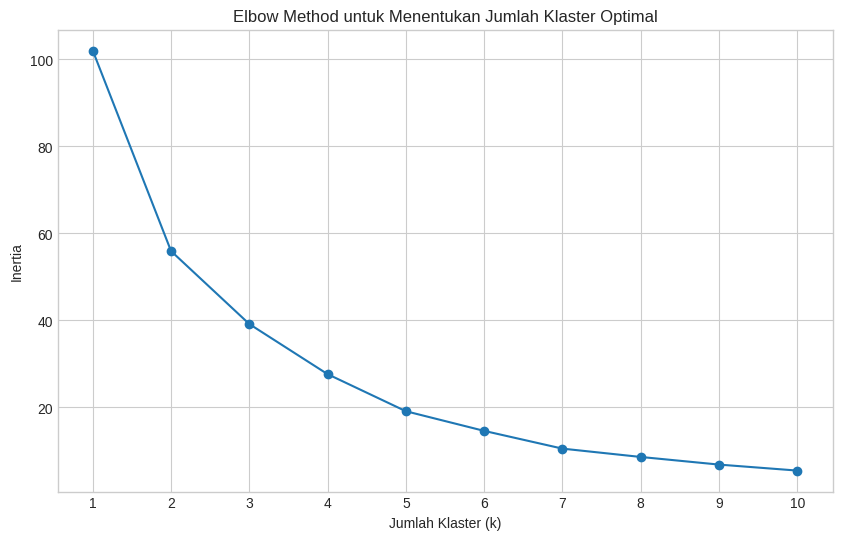

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    df = pd.read_csv(file_gabungan_path)
    df_agg = df.groupby('nama_provinsi').mean().drop(columns=['tahun'])
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)
    # -----------------------------------------------------------------

    # --- TAHAP 2:ELBOW METHOD ---
    possible_k = range(1, 11)
    inertia_values = []
    for k in possible_k:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(df_scaled)
        inertia_values.append(kmeans.inertia_)

    # --- MEMBUAT GRAFIK ELBOW ---
    plt.figure(figsize=(10, 6))
    plt.plot(possible_k, inertia_values, 'o-')
    plt.xlabel('Jumlah Klaster (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method untuk Menentukan Jumlah Klaster Optimal')
    plt.xticks(possible_k)
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

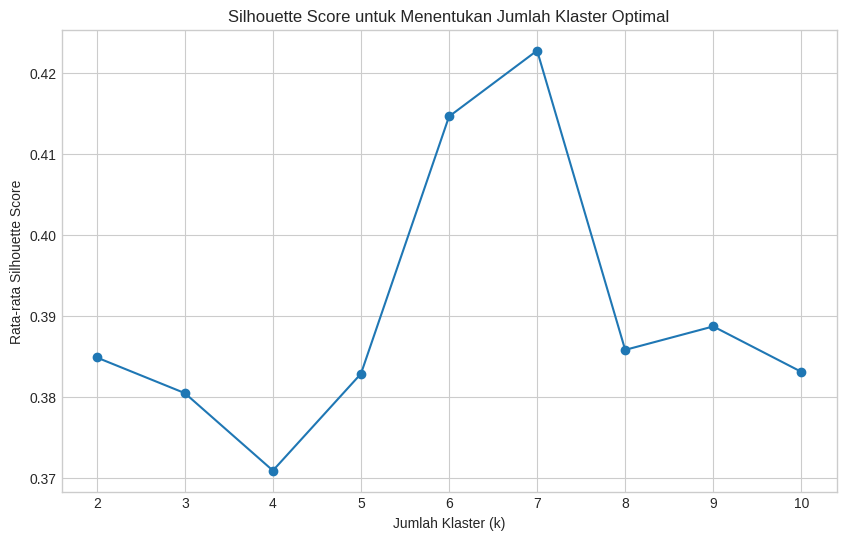

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    df = pd.read_csv(file_gabungan_path)
    df_agg = df.groupby('nama_provinsi').mean().drop(columns=['tahun'])
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)
    # -----------------------------------------------------------------

    # --- TAHAP 2B: SILHOUETTE SCORE ---
    possible_k = range(2, 11)
    silhouette_scores = []

    for k in possible_k:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(df_scaled)
        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    # ---GRAFIK SILHOUETTE SCORE ---
    plt.figure(figsize=(10, 6))
    plt.plot(possible_k, silhouette_scores, 'o-')
    plt.xlabel('Jumlah Klaster (k)')
    plt.ylabel('Rata-rata Silhouette Score')
    plt.title('Silhouette Score untuk Menentukan Jumlah Klaster Optimal')
    plt.xticks(possible_k)
    plt.grid(True)
    plt.show()

except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    df = pd.read_csv(file_gabungan_path)
    df_agg = df.groupby('nama_provinsi').mean().drop(columns=['tahun'])
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)
    # -----------------------------------------------------------------

    possible_k = range(2, 11)
    inertia_values = []
    silhouette_scores = []

    # Menghitung skor untuk setiap k
    for k in possible_k:
        kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
        kmeans.fit(df_scaled)

        if k == 2:
            kmeans_k1 = KMeans(n_clusters=1, init='k-means++', n_init=10, random_state=42)
            kmeans_k1.fit(df_scaled)
            inertia_values.append(kmeans_k1.inertia_)

        inertia_values.append(kmeans.inertia_)

        score = silhouette_score(df_scaled, kmeans.labels_)
        silhouette_scores.append(score)

    # --- TABEL PERBANDINGAN ---
    results_df = pd.DataFrame({
        'Jumlah Klaster (k)': possible_k,
        'Silhouette Score': silhouette_scores
    })

    inertia_k = inertia_values[1:]
    inertia_k_minus_1 = inertia_values[:-1]

    inertia_decrease = [( inertia_k_minus_1[i] - inertia_k[i] ) / inertia_k_minus_1[i] * 100
                        for i in range(len(inertia_k))]

    results_df['Inertia'] = inertia_k
    results_df['Penurunan Inertia (%)'] = inertia_decrease

    results_df = results_df[['Jumlah Klaster (k)', 'Inertia', 'Penurunan Inertia (%)', 'Silhouette Score']]


    print("================== TABEL STATISTIK KEPUTUSAN KLASTER ==================")
    print(results_df.round(3).to_string(index=False))

except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== TABEL STATISTIK KEPUTUSAN KLASTER ==================
 Jumlah Klaster (k)  Inertia  Penurunan Inertia (%)  Silhouette Score
                  2   55.915                 45.182             0.385
                  3   39.139                 30.002             0.380
                  4   27.617                 29.439             0.371
                  5   19.098                 30.846             0.383
                  6   14.579                 23.665             0.415
                  7   10.501                 27.972             0.423
                  8    8.587                 18.229             0.386
                  9    6.832                 20.430             0.389
                 10    5.455                 20.159             0.383


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

file_gabungan_path = 'data_provinsi_gabungann.csv'

try:
    df = pd.read_csv(file_gabungan_path)
    df_agg = df.groupby('nama_provinsi').mean().drop(columns=['tahun'])
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)
    # -----------------------------------------------------------------

    # --- K-MEANS DENGAN K=7 ---

    jumlah_klaster_final = 7

    kmeans = KMeans(n_clusters=jumlah_klaster_final, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)

    df_agg['klaster'] = kmeans.labels_

    print("================== HASIL PENGELOMPOKAN 7 KLASTER ==================")

    for i in range(jumlah_klaster_final):
        print(f"\n--- ANGGOTA KLASTER {i} ---")
        anggota = df_agg[df_agg['klaster'] == i].index.tolist()
        print(anggota)

    print("\n" + "="*70 + "\n")

    print("================== PROFIL KARAKTERISTIK SETIAP KLASTER ==================")
    cluster_profiles = df_agg.groupby('klaster').mean()
    print(cluster_profiles.round(2))


except FileNotFoundError:
    print(f"!!! KESALAHAN: File '{file_gabungan_path}' tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")

================== HASIL PENGELOMPOKAN 7 KLASTER ==================

--- ANGGOTA KLASTER 0 ---
['KALIMANTAN BARAT', 'MALUKU UTARA', 'SULAWESI BARAT']

--- ANGGOTA KLASTER 1 ---
['BANTEN', 'JAMBI', 'JAWA BARAT', 'JAWA TIMUR', 'KALIMANTAN SELATAN', 'KALIMANTAN TENGAH', 'KEPULAUAN BANGKA BELITUNG', 'RIAU', 'SULAWESI SELATAN', 'SULAWESI UTARA', 'SUMATERA BARAT', 'SUMATERA UTARA']

--- ANGGOTA KLASTER 2 ---
['NUSA TENGGARA TIMUR', 'PAPUA', 'PAPUA BARAT']

--- ANGGOTA KLASTER 3 ---
['DKI JAKARTA']

--- ANGGOTA KLASTER 4 ---
['ACEH', 'BENGKULU', 'GORONTALO', 'JAWA TENGAH', 'LAMPUNG', 'MALUKU', 'NUSA TENGGARA BARAT', 'SULAWESI TENGAH', 'SULAWESI TENGGARA', 'SUMATERA SELATAN']

--- ANGGOTA KLASTER 5 ---
['KALIMANTAN UTARA']

--- ANGGOTA KLASTER 6 ---
['BALI', 'DI YOGYAKARTA', 'KALIMANTAN TIMUR', 'KEPULAUAN RIAU']


================== PROFIL KARAKTERISTIK SETIAP KLASTER ==================
         kemiskinan  pengeluaran    ipm    hls
klaster                                       
0             

## Visualisasi

Membuat Visualisasi 1: Tren Waktu Rata-rata Nasional...


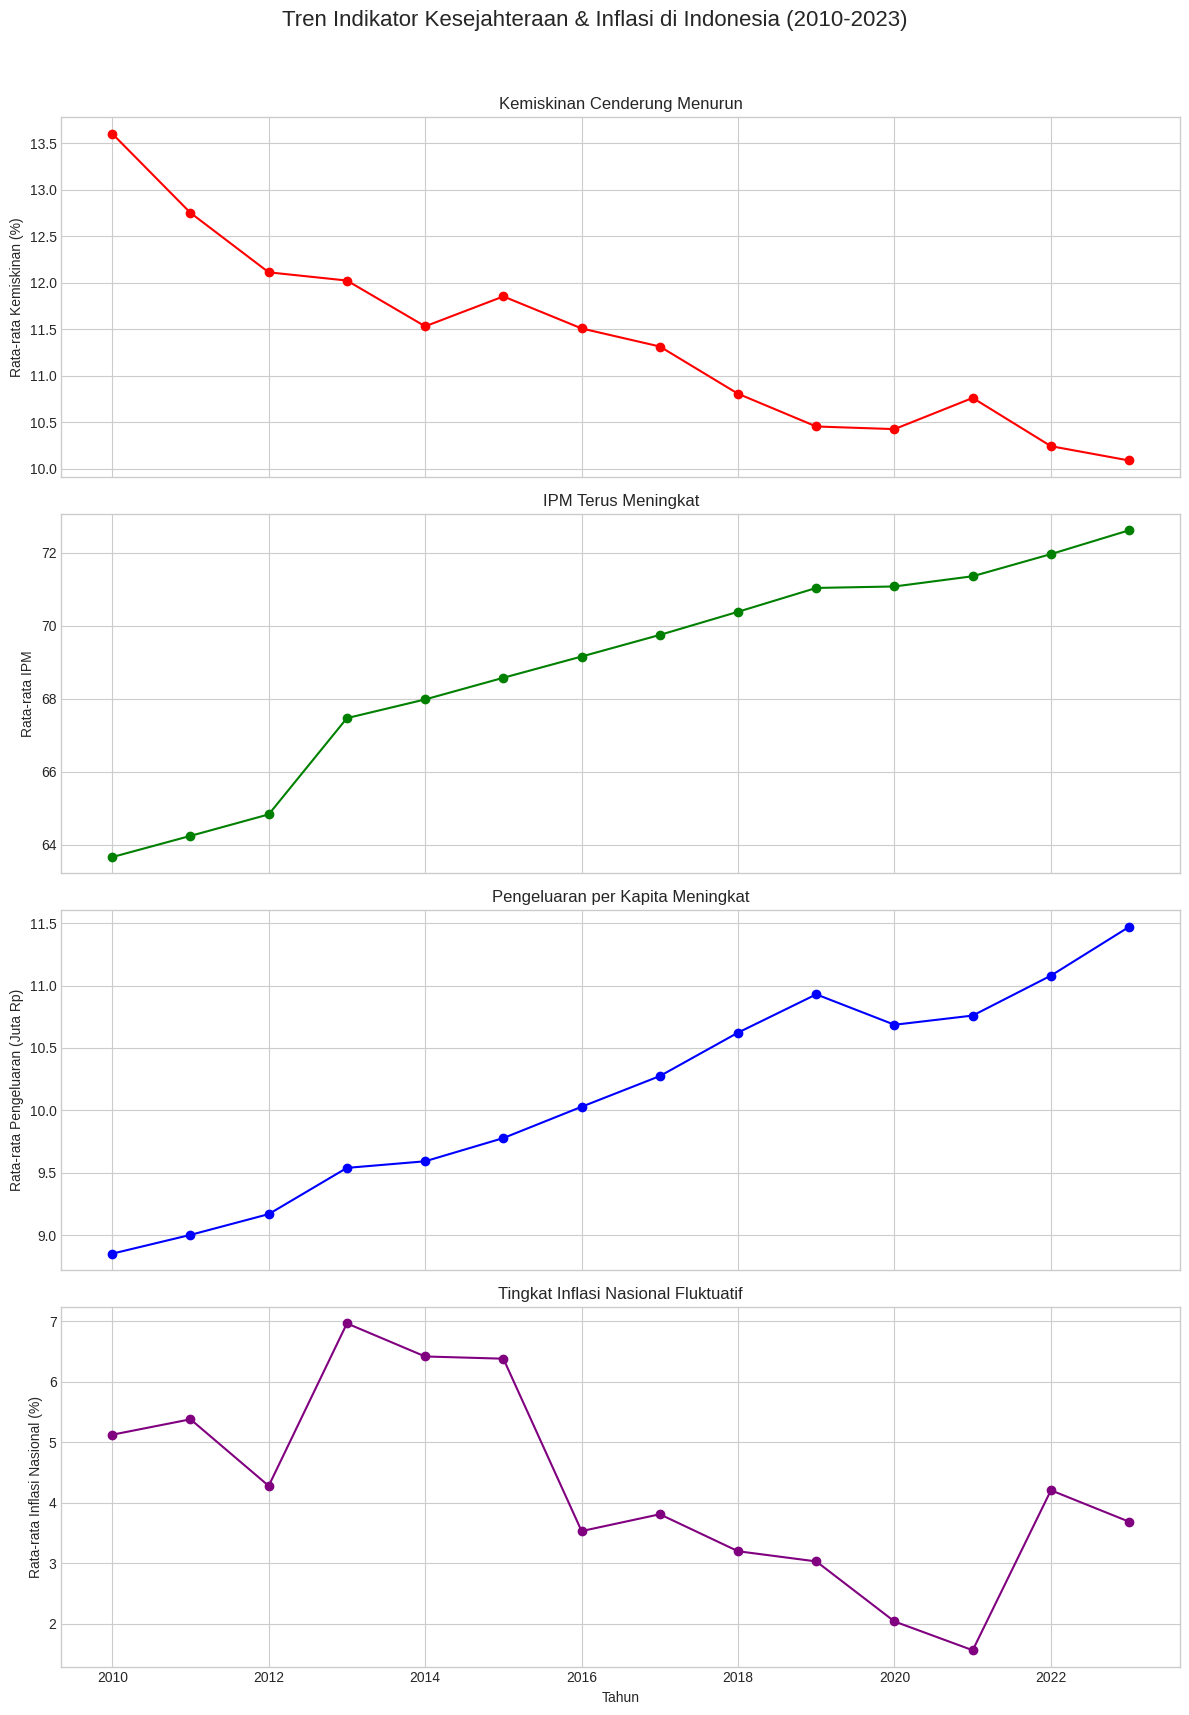

Grafik 1 berhasil disimpan sebagai 'plot1_tren_waktu.png'

Membuat Visualisasi 2: Grafik Penentuan Jumlah Klaster...


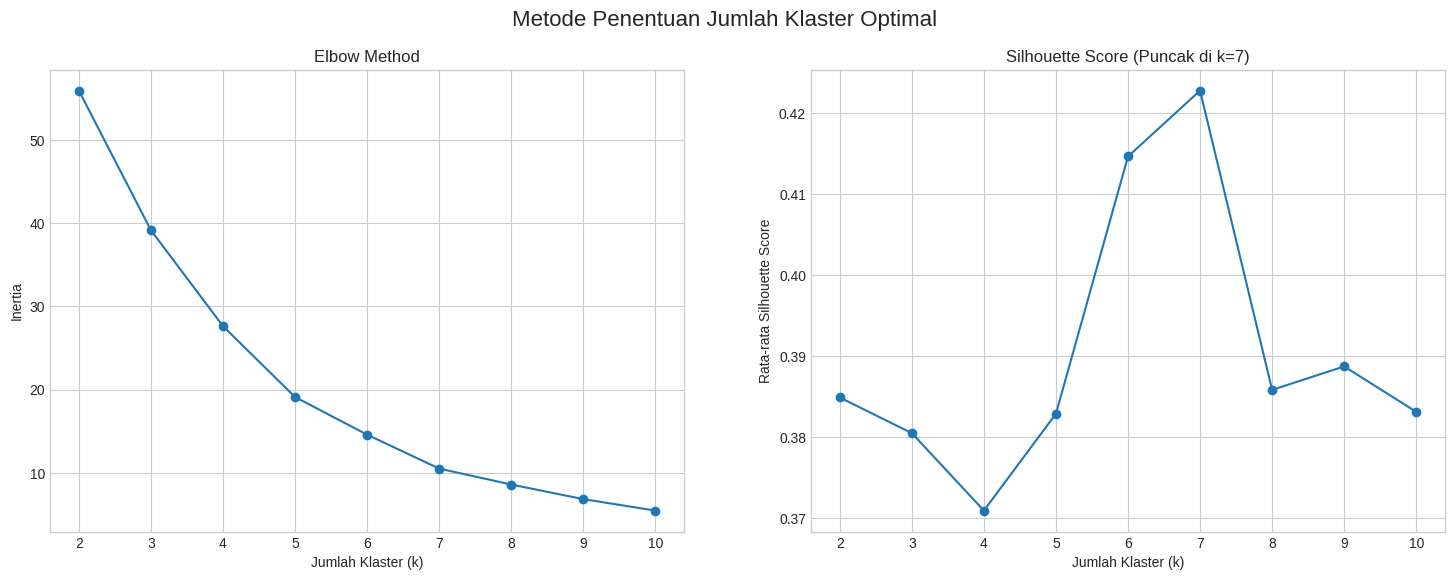

Grafik 2 berhasil disimpan sebagai 'plot2_penentuan_klaster.png'

Membuat Visualisasi 3: Perbandingan Profil Klaster...


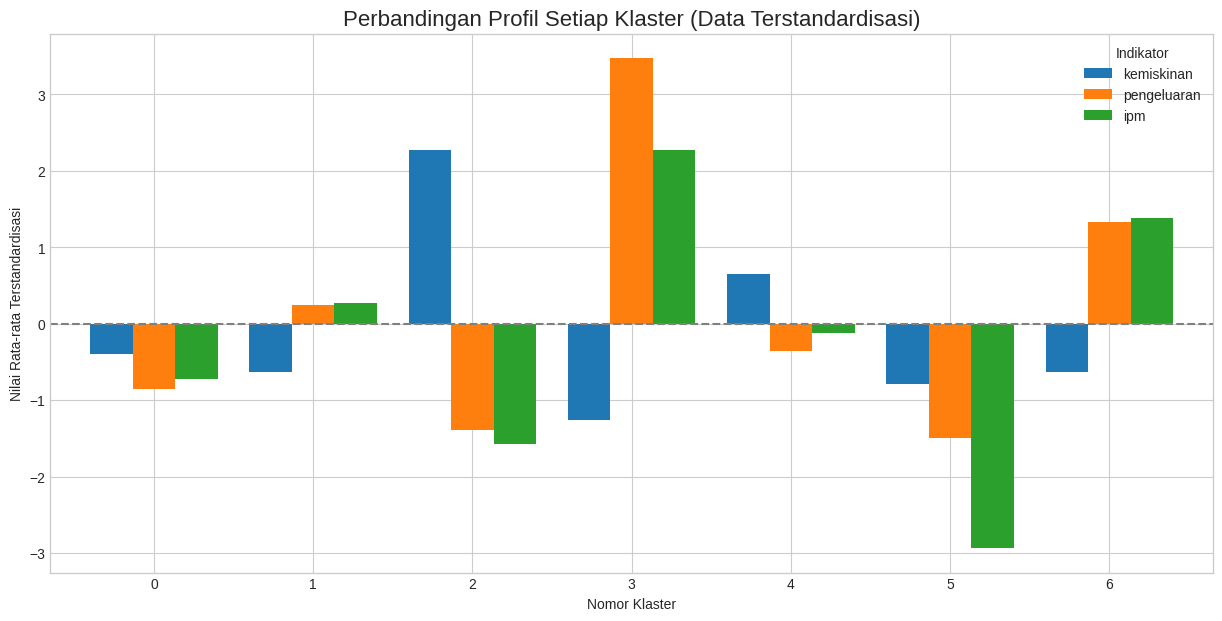

Grafik 3 berhasil disimpan sebagai 'plot3_profil_klaster.png'


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

plt.style.use('seaborn-v0_8-whitegrid')

# Path
file_gabungan_path = 'data_provinsi_gabungann.csv'
file_inflasi_path = '/content/Inflasi (Y on Y) Berdasarkan Bulan di Indonesia.csv'

# --- MEMBACA DATA ---
try:
    df_gabungan = pd.read_csv(file_gabungan_path)
    df_inflasi = pd.read_csv(file_inflasi_path)
except FileNotFoundError as e:
    print(f"!!! KESALAHAN: File tidak ditemukan. Pastikan file '{e.filename}' ada.")
    exit()

# --- VISUALISASI 1: TREN WAKTU NASIONAL (EDA) ---
print("Membuat Visualisasi 1: Tren Waktu Rata-rata Nasional...")

# Agregasi data provinsi per tahun
kolom_numerik = ['kemiskinan', 'pengeluaran', 'ipm', 'hls']
df_tren = df_gabungan.groupby('tahun')[kolom_numerik].mean()
# -------------------------

# Agregasi data inflasi nasional dari bulanan ke tahunan
df_inflasi_tahunan = df_inflasi[df_inflasi['tahun'].between(2010, 2023)].groupby('tahun')['nilai_inflasi'].mean()

fig, axs = plt.subplots(4, 1, figsize=(12, 18), sharex=True)
fig.suptitle('Tren Indikator Kesejahteraan & Inflasi di Indonesia (2010-2023)', fontsize=16)

# Plot Kemiskinan
axs[0].plot(df_tren.index, df_tren['kemiskinan'], marker='o', color='r')
axs[0].set_ylabel('Rata-rata Kemiskinan (%)')
axs[0].set_title('Kemiskinan Cenderung Menurun')

# Plot IPM
axs[1].plot(df_tren.index, df_tren['ipm'], marker='o', color='g')
axs[1].set_ylabel('Rata-rata IPM')
axs[1].set_title('IPM Terus Meningkat')

# Plot Pengeluaran
axs[2].plot(df_tren.index, df_tren['pengeluaran'], marker='o', color='b')
axs[2].set_ylabel('Rata-rata Pengeluaran (Juta Rp)')
axs[2].set_title('Pengeluaran per Kapita Meningkat')

# Plot Inflasi
axs[3].plot(df_inflasi_tahunan.index, df_inflasi_tahunan, marker='o', color='purple')
axs[3].set_ylabel('Rata-rata Inflasi Nasional (%)')
axs[3].set_title('Tingkat Inflasi Nasional Fluktuatif')
axs[3].set_xlabel('Tahun')

plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.savefig('plot1_tren_waktu.png')
plt.show()
print("Grafik 1 berhasil disimpan sebagai 'plot1_tren_waktu.png'")


df_agg = df_gabungan.groupby('nama_provinsi')[kolom_numerik].mean()
features = ['kemiskinan', 'pengeluaran', 'ipm']
data_for_clustering = df_agg[features]
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_for_clustering)
df_scaled = pd.DataFrame(data_scaled, columns=features, index=data_for_clustering.index)

# --- PENENTUAN JUMLAH KLASTER ---
print("\nMembuat Visualisasi 2: Grafik Penentuan Jumlah Klaster...")
possible_k = range(2, 11)
inertia_values = []
silhouette_scores = []
for k in possible_k:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(df_scaled)
    inertia_values.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))
fig.suptitle('Metode Penentuan Jumlah Klaster Optimal', fontsize=16)

# Plot Elbow
ax1.plot(possible_k, inertia_values, 'o-')
ax1.set_xlabel('Jumlah Klaster (k)')
ax1.set_ylabel('Inertia')
ax1.set_title('Elbow Method')
ax1.set_xticks(possible_k)

# Plot Silhouette
ax2.plot(possible_k, silhouette_scores, 'o-')
ax2.set_xlabel('Jumlah Klaster (k)')
ax2.set_ylabel('Rata-rata Silhouette Score')
ax2.set_title('Silhouette Score (Puncak di k=7)')
ax2.set_xticks(possible_k)

plt.savefig('plot2_penentuan_klaster.png')
plt.show()
print("Grafik 2 berhasil disimpan sebagai 'plot2_penentuan_klaster.png'")


# --- VISUALISASI 3: PROFIL KLASTER ---
print("\nMembuat Visualisasi 3: Perbandingan Profil Klaster...")
# Menjalankan K-Means dengan k=7
k_final = 7
kmeans = KMeans(n_clusters=k_final, init='k-means++', n_init=10, random_state=42)
kmeans.fit(df_scaled)
df_agg['klaster'] = kmeans.labels_

# Kita gunakan data yang sudah di-standardisasi untuk visualisasi perbandingan
df_agg_scaled = df_agg.copy()
df_agg_scaled[features] = df_scaled[features]
cluster_profiles_scaled = df_agg_scaled.groupby('klaster')[features].mean()

# Membuat plot
cluster_profiles_scaled.plot(kind='bar', figsize=(15, 7), width=0.8)
plt.title('Perbandingan Profil Setiap Klaster (Data Terstandardisasi)', fontsize=16)
plt.ylabel('Nilai Rata-rata Terstandardisasi')
plt.xlabel('Nomor Klaster')
plt.xticks(rotation=0)
plt.axhline(0, color='grey', linestyle='--')
plt.legend(title='Indikator')
plt.savefig('plot3_profil_klaster.png')
plt.show()
print("Grafik 3 berhasil disimpan sebagai 'plot3_profil_klaster.png'")

## spasial

In [ ]:
!pip install geopandas

In [ ]:
# !unzip peta.zip

Archive:  peta.zip
replace D:/file_peta_indonesia/BATAS PROVINSI DESEMBER 2019 DUKCAPIL.zip? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Membaca file peta...

Menyamakan nama provinsi yang berbeda...
Nama provinsi telah disamakan.

Menggabungkan data peta dengan hasil klaster...

Membuat visualisasi peta final...


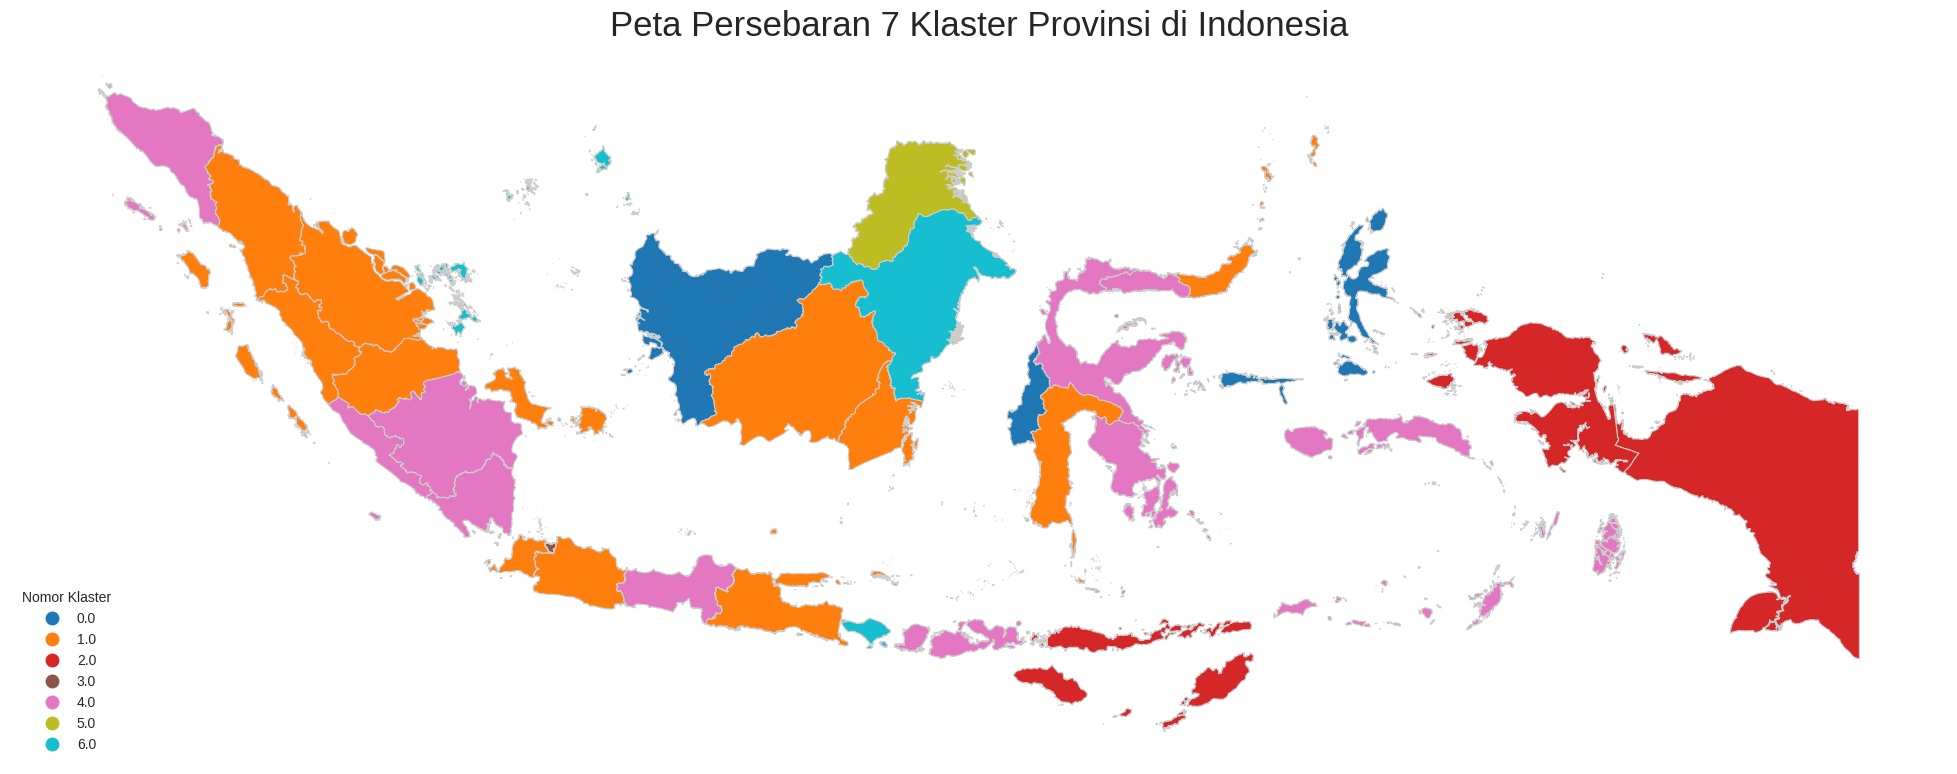


Grafik Peta Final berhasil disimpan sebagai 'plot_final_peta_klaster.png'


In [ ]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# --- PATH---
file_gabungan_path = 'data_provinsi_gabungann.csv'
file_peta_path = '/content/D:/file_peta_indonesia/BATAS_PROVINSI_DESEMBER_2019_DUKCAPIL.shp'

try:
    df = pd.read_csv(file_gabungan_path)
    df_agg = df.groupby('nama_provinsi').mean().drop(columns=['tahun'])
    features = ['kemiskinan', 'pengeluaran', 'ipm']
    data_for_clustering = df_agg[features]
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_for_clustering)
    k_final = 7
    kmeans = KMeans(n_clusters=k_final, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(data_scaled)
    df_agg['klaster'] = kmeans.labels_
    df_agg.reset_index(inplace=True)
    print("Membaca file peta...")
    map_df = gpd.read_file(file_peta_path)

    map_df = map_df.rename(columns={'PROVINSI': 'nama_provinsi'})

    map_df['nama_provinsi'] = map_df['nama_provinsi'].str.upper()

    print("\nMenyamakan nama provinsi yang berbeda...")
    nama_mapping = {
        'YOGYAKARTA': 'DI YOGYAKARTA',
        'JAKARTA RAYA': 'DKI JAKARTA',
        'KEP. BANGKA BELITUNG': 'KEPULAUAN BANGKA BELITUNG',
        'KEPULAUAN BANGKA BELITUNG' : 'KEPULAUAN BANGKA BELITUNG'
    }
    map_df['nama_provinsi'] = map_df['nama_provinsi'].replace(nama_mapping)
    print("Nama provinsi telah disamakan.")

    # --- MENGGABUNGKAN DATA PETA DENGAN DATA KLASTER ---
    print("\nMenggabungkan data peta dengan hasil klaster...")
    merged_map = map_df.merge(df_agg, on='nama_provinsi', how='left')

    # --- MEMBUAT VISUALISASI PETA KLASTER ---
    print("\nMembuat visualisasi peta final...")
    fig, ax = plt.subplots(1, 1, figsize=(25, 15))
    merged_map.plot(column='klaster', cmap='tab10', linewidth=0.8, ax=ax, edgecolor='0.8',
                    legend=True, categorical=True,
                    legend_kwds={'title': "Nomor Klaster", 'loc': 'lower left'})

    ax.set_title('Peta Persebaran 7 Klaster Provinsi di Indonesia', fontdict={'fontsize': '25', 'fontweight': '3'})
    ax.axis('off')

    plt.savefig('plot_final_peta_klaster.png')
    plt.show()
    print("\nGrafik Peta Final berhasil disimpan sebagai 'plot_final_peta_klaster.png'")

except FileNotFoundError:
    print(f"!!! KESALAHAN: File tidak ditemukan.")
except Exception as e:
    print(f"!!! Terjadi kesalahan: {e}")